In [5]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# red, blue, green, yellow, purple, orange, teal blue, pink, other color
palette=['#ff3b30', '#4cd964','#ffcc00',  '#007aff','#5856d6', '#ff9500', '#5ac8fa', '#ff2d55','#969783']
markers=['o', '^', '<', 'd', '*','2']
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth']=1
rc("font", **{'family':'serif','serif':['Palatino'], 'size':12})
rc('text', usetex=True)
import os

In [6]:
basepath="/Users/jiangnanhugo/PycharmProjects/cvdso/plots/"

In [39]:

def plot_quantile_nmse(total, name, title, metric_name, use_logy=False, show_ylabel=True, use_hatches=False):
    VSR_DPG=[abs(float(line.split("\t")[0])) for line in total.split("\n")]
    GP=[abs(float(line.split("\t")[1])) for line in total.split("\n")]
    CVGP=[abs(float(line.split("\t")[2])) for line in total.split("\n")]
    VPG=[abs(float(line.split("\t")[3])) for line in total.split("\n")]
    PQT=[abs(float(line.split("\t")[4])) for line in total.split("\n")]
    DSR=[abs(float(line.split("\t")[5])) for line in total.split("\n")]
    GPMELD=[abs(float(line.split("\t")[6])) for line in total.split("\n")]
    Eureqa=[abs(float(line.split("\t")[7])) for line in total.split("\n")]
    MCTS=[abs(float(line.split("\t")[8])) for line in total.split("\n")]
    df=pd.DataFrame({
        "model": VSR_DPG+CVGP+GP+Eureqa+MCTS+VPG+PQT+DSR+GPMELD,
        "type": ['VSR-DPG(ours)']*10+['VSR-GP']*10+['GP']*10+['Eureqa']*10+['SPL']*10+['VPG']*10+['PQT']*10+['DSR']*10+['GPMeld']*10
    })
    

    plt.figure(figsize=(4,2.9))
    ax=sns.boxplot(data=df, x="model", y="type", 
                   showfliers=True, 
                   width=0.5, hue='type',
                    palette=palette)
    ax.set_title(title, fontsize=16)
    ax.set(xlabel=metric_name, ylabel="")
    if use_logy==True:
        plt.xscale('log', base=10)
        
    if show_ylabel==False:
        ax.set(yticklabels=[])
    if use_hatches==True:
        hatches = ["/", "o", "*", "\\"]
        for hatch, patch in zip(hatches, ax.artists):
            patch.set_hatch(hatch)
    plt.yticks(rotation=40)    

    fname = os.path.join(basepath, name+".pdf")
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

# inv

# sin cos

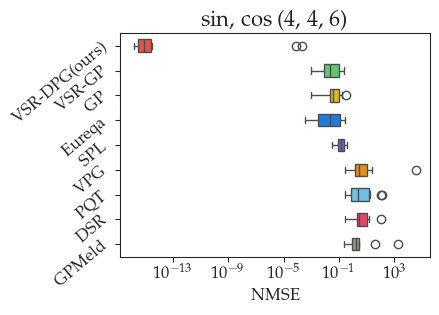

In [40]:
total="""1.99E-16	-0.02279089019	-0.01720397622	-1.928834945	-1.973065132	-1.807313086	-2.344868266	-0.109563115	-0.04429012341
3.28E-16	-0.07579673929	-0.0009105627062	-33571.8839	-110.3384671	-11.67789932	-1864.142841	-0.0003389016116	-0.1701373077
1.57E-16	-0.1663137703	-0.131794477	-2.811462568	-2.789374538	-2.657500015	-2.529248212	-0.1326339923	-0.1034560373
2.88E-16	-0.04366428173	-0.01750627082	-1.010211591	-1.137828398	-0.9773504079	-0.9952799437	-0.001774210648	-0.33545558
3.34E-15	-0.3416898582	-0.2199451963	-3.194291471	-2.886154422	-2.973103344	-2.753002357	-0.001111196934	-0.2374734444
2.20E-04	-0.001342166648	-0.001342166648	-0.2658650581	-0.2839344921	-0.2722951447	-0.2201402031	-0.006915832854	-0.08097769056
8.43E-05	-0.02800431197	-0.02800431197	-22.11554265	-135.9363262	-1.96712722	-0.9226298429	-0.1257112507	-0.3672323787
3.34E-16	-0.0008985419461	-0.005354488181	-3.167650788	-0.3639842544	-113.4883446	-0.7576647115	-0.02878101479	-0.212539058
1.36E-15	-0.03588675532	-0.0309483116	-1.139015806	-0.5758759331	-4.797776171	-0.9485044945	-0.01923825875	-0.03156100581
1.36E-15	-0.1061348516	-0.1979560891	-14.02267298	-17.49595912	-13.9881551	-40.02616197	-0.29065399	-0.1176917492"""
metric_name="NMSE"
name="sincos_nv4_nt46_"+metric_name
title="sin, cos (4, 4, 6)"
plot_quantile_nmse(total, name, title,metric_name=metric_name, use_logy=True, show_ylabel=True)
